In [1]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import string
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow import keras
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import classification_report
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Text Processing-Removing stop words,Tokenization 

In [2]:
#function to remove  stopwords
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ''.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    removed_stop_words = list(filter(lambda x: x != '', removed_stop_words))
    return removed_stop_words


def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = word_tokenize(review) 
    review = remove_stop_words(review) #remove stop words
    review = ' '.join(review)
    return review

# Count Vectorizer with ngrams

In [3]:
def CV_ngrams(X_train,X_test):
    count_vectorizer = CountVectorizer (binary=True, ngram_range=(1, 3))
    count_vectorizer.fit(X)
    train_features_cv = count_vectorizer.transform(X_train)
    test_features_cv = count_vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# Count Vectorizer 

In [4]:
def Count_Vectorizer(X_train,X_test):
    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(X)
    train_features_cv = count_vectorizer.transform(X_train)
    test_features_cv = count_vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# TF-IDF

In [5]:
def tfidf(X_train,X_test):    
    vectorizer = TfidfVectorizer ()
    vectorizer.fit(X)
    train_features_cv = vectorizer.transform(X_train)
    test_features_cv = vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# Confusion Matrix

In [6]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1,2] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 

In [7]:
def plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

# DRUGS.Com - Test Data

In [8]:
drugsCom_path = 'drugsCom_raw.csv'
drugsCom_data = pd.read_csv(drugsCom_path)
for i in range(len(drugsCom_data)):
    if((pd.isnull(drugsCom_data.review[i])) == True):
        drugsCom_data = drugsCom_data.drop([i])
    elif((pd.isnull(drugsCom_data.rating[i])) == True):
        drugsCom_data = drugsCom_data.drop([i])  
drugsCom_data['rating_label'] = drugsCom_data.rating.apply(lambda x : 0 if x <= 4 else (1 if x in range(5,7) else 2))
drugsCom_data.drop(["drugID","drugName","condition","date","rating","usefulCount"],axis=1,inplace=True)
drugsCom_data['review_clean_data'] = drugsCom_data.review.apply(clean_data)
X_test = drugsCom_data["review_clean_data"].values
y_test = drugsCom_data["rating_label"].values
print("Shape of drugsCom data: ",drugsCom_data.shape)

Shape of drugsCom data:  (215063, 3)


# DRUGLIB - Train Data

In [9]:
drugLib_path = 'drugLib_raw.csv'
drugLib_data = pd.read_csv(drugLib_path)
for i in range(len(drugLib_data)):
    if((pd.isnull(drugLib_data.effectiveness[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.sideEffects[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.benefitsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.sideEffectsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.commentsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i]) 
    elif((pd.isnull(drugLib_data.rating[i])) == True):
        drugLib_data = drugLib_data.drop([i])        
drugLib_data['effectiveness_class'] = drugLib_data.effectiveness.apply(lambda x : 2 if x in ["Highly Effective","Considerably Effective"] else (1 if x in ["Moderately Effective " , "Marginally Effective"] else 0))
drugLib_data['sideEffects_class'] = drugLib_data.sideEffects.apply(lambda x : 0 if x in ["Extremely Severe Side Effects","Severe Side Effects"] else (1 if x in ["Mild Side Effects" , "Moderate Side Effects"] else 2))
drugLib_data['Total_Reviews'] = drugLib_data["benefitsReview"] + drugLib_data["sideEffectsReview"] + drugLib_data["commentsReview"]
drugLib_data['rating_label'] = drugLib_data.rating.apply(lambda x : 0 if x <= 4 else (1 if x in range(5,7) else 2))
drugLib_data.drop(["DrugID","urlDrugName","condition","commentsReview","rating","effectiveness","sideEffects"],axis=1,inplace=True) 
drugLib_data['rating_clean_data'] = drugLib_data.Total_Reviews.apply(clean_data)
X_train = drugLib_data["rating_clean_data"].values
y_train = drugLib_data["rating_label"].values
print("Shape of drugLib_data data: ",drugLib_data.shape)

Shape of drugLib_data data:  (4133, 7)


In [10]:
X = np.concatenate([X_train,X_test])
eff_train_X_tfidf ,eff_test_X_tfidf = tfidf(X_train,X_test)
eff_train_X_cv ,eff_test_X_cv = Count_Vectorizer(X_train,X_test)
eff_train_X_cv_ngrams ,eff_test_X_cv_ngrams = CV_ngrams(X_train,X_test)

# Rating 

WordCloud for rating < 4


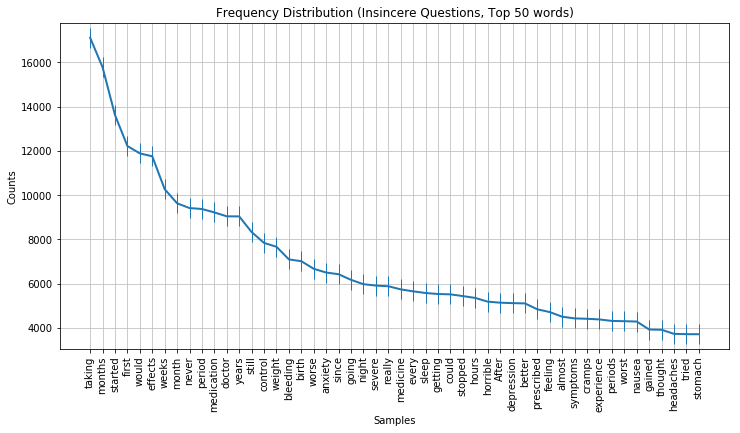

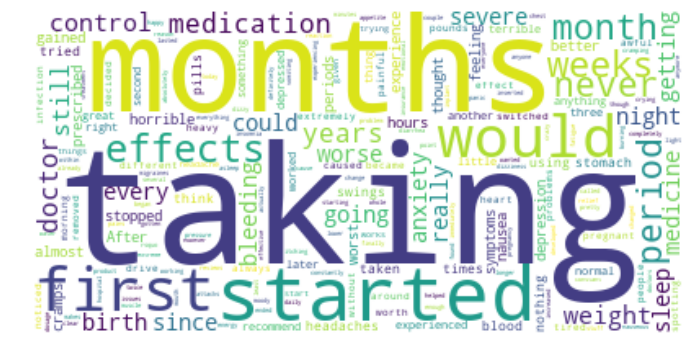

In [21]:
effectiveness = drugsCom_data.loc[drugsCom_data['rating_label'] == 0].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[0]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for rating < 4")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud for rating >= 7


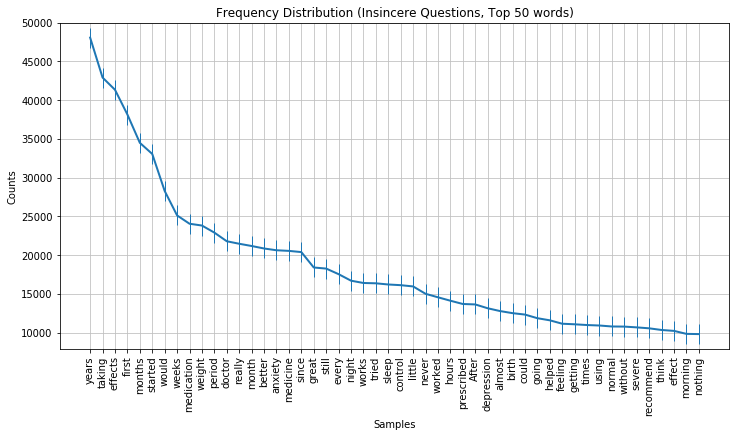

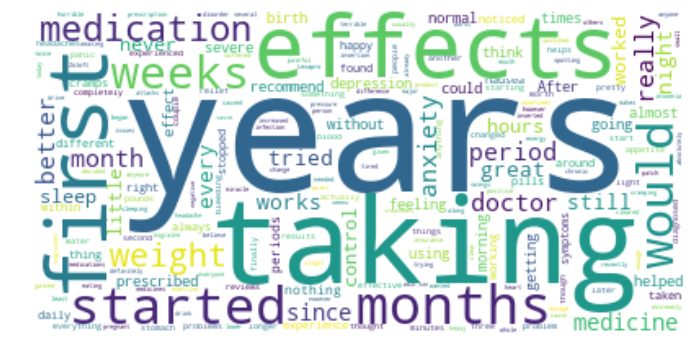

In [22]:
effectiveness = drugsCom_data.loc[drugsCom_data['rating_label'] == 2].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[0]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for rating >= 7")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Count Vectorizer and KNN
Accuracy: 0.6222037263499532
              precision    recall  f1-score   support

           0       0.30      0.01      0.02     53572
           1       0.11      0.09      0.10     19185
           2       0.66      0.92      0.77    142306

   micro avg       0.62      0.62      0.62    215063
   macro avg       0.36      0.34      0.30    215063
weighted avg       0.52      0.62      0.53    215063



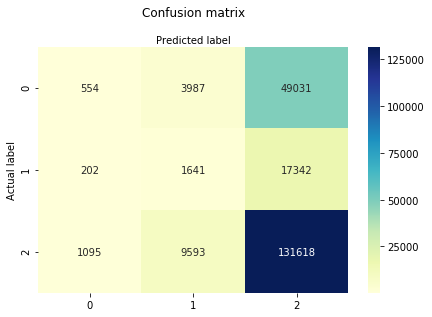

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv,y_train)
y_pred=knn.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFDIF and KNN
Accuracy: 0.6315637743358923
              precision    recall  f1-score   support

           0       0.40      0.26      0.31     53572
           1       0.11      0.04      0.06     19185
           2       0.70      0.85      0.77    142306

   micro avg       0.63      0.63      0.63    215063
   macro avg       0.40      0.38      0.38    215063
weighted avg       0.57      0.63      0.59    215063



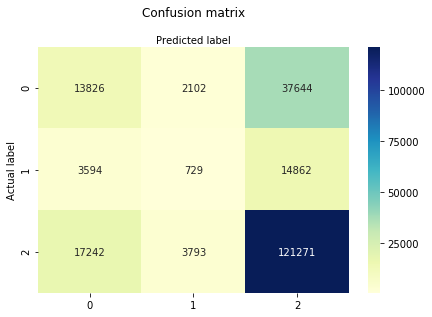

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_tfidf,y_train)
y_pred=knn.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFDIF and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and KNN
Accuracy: 0.6615596360136332
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     53572
           1       0.05      0.00      0.00     19185
           2       0.66      1.00      0.80    142306

   micro avg       0.66      0.66      0.66    215063
   macro avg       0.24      0.33      0.27    215063
weighted avg       0.44      0.66      0.53    215063



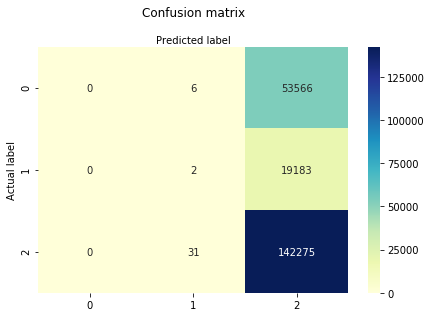

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv_ngrams,y_train)
y_pred=knn.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.6867290049892357
              precision    recall  f1-score   support

           0       0.54      0.46      0.50     53572
           1       0.13      0.05      0.07     19185
           2       0.75      0.86      0.80    142306

   micro avg       0.69      0.69      0.69    215063
   macro avg       0.47      0.46      0.46    215063
weighted avg       0.64      0.69      0.66    215063



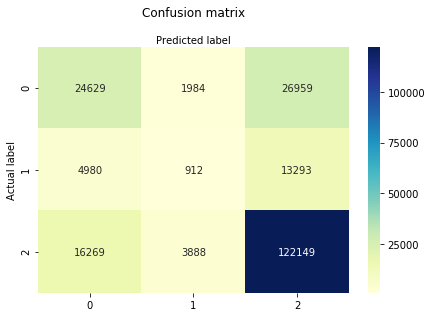

In [13]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv,y_train)
y_pred=logreg.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tfidf and Logistic Regression
Accuracy: 0.6984046535201313
              precision    recall  f1-score   support

           0       0.71      0.20      0.32     53572
           1       0.43      0.00      0.00     19185
           2       0.70      0.98      0.81    142306

   micro avg       0.70      0.70      0.70    215063
   macro avg       0.61      0.39      0.38    215063
weighted avg       0.68      0.70      0.62    215063



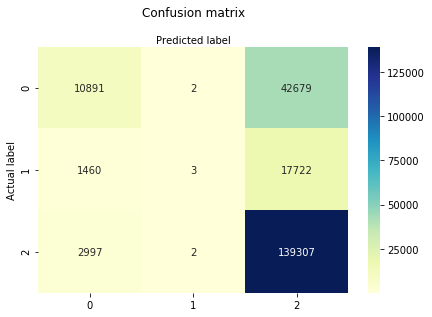

In [14]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_tfidf,y_train)
y_pred=logreg.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("tfidf and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7046400357104662
              precision    recall  f1-score   support

           0       0.61      0.32      0.42     53572
           1       0.12      0.00      0.00     19185
           2       0.72      0.94      0.82    142306

   micro avg       0.70      0.70      0.70    215063
   macro avg       0.49      0.42      0.41    215063
weighted avg       0.64      0.70      0.65    215063



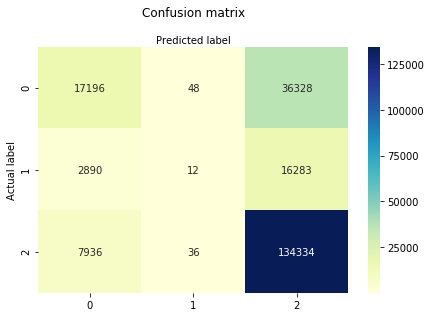

In [15]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv_ngrams,y_train)
y_pred=logreg.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Random Forest
Accuracy: 0.6667209143367292
              precision    recall  f1-score   support

           0       0.54      0.06      0.11     53572
           1       0.08      0.00      0.00     19185
           2       0.67      0.98      0.80    142306

   micro avg       0.67      0.67      0.67    215063
   macro avg       0.43      0.35      0.30    215063
weighted avg       0.59      0.67      0.56    215063



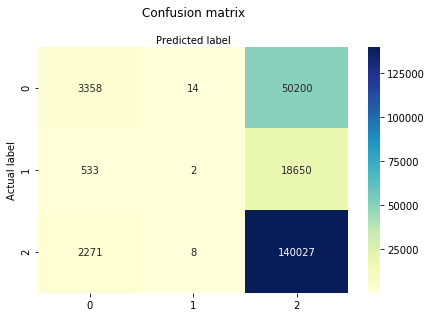

In [10]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv,y_train)
y_pred=forest.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Random Forest
Accuracy: 0.6702501127576571
              precision    recall  f1-score   support

           0       0.52      0.12      0.20     53572
           1       0.16      0.00      0.00     19185
           2       0.68      0.97      0.80    142306

   micro avg       0.67      0.67      0.67    215063
   macro avg       0.45      0.36      0.33    215063
weighted avg       0.59      0.67      0.58    215063



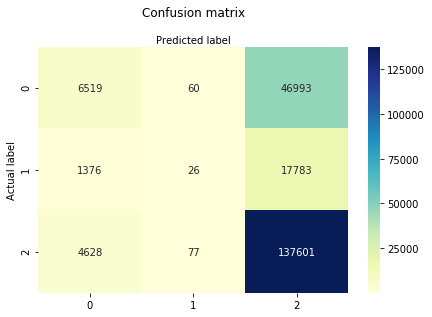

In [11]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_tfidf,y_train)
y_pred=forest.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Random Forest
Accuracy: 0.6620618144450696
              precision    recall  f1-score   support

           0       0.74      0.00      0.00     53572
           1       0.00      0.00      0.00     19185
           2       0.66      1.00      0.80    142306

   micro avg       0.66      0.66      0.66    215063
   macro avg       0.47      0.33      0.27    215063
weighted avg       0.62      0.66      0.53    215063



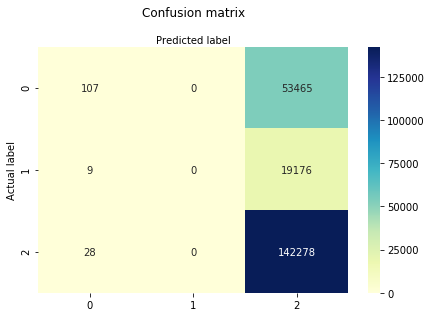

In [12]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv_ngrams,y_train)
y_pred=forest.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Bagging
Accuracy: 0.665567763864542
              precision    recall  f1-score   support

           0       0.48      0.24      0.32     53572
           1       0.10      0.01      0.01     19185
           2       0.70      0.91      0.79    142306

   micro avg       0.67      0.67      0.67    215063
   macro avg       0.43      0.39      0.37    215063
weighted avg       0.59      0.67      0.60    215063



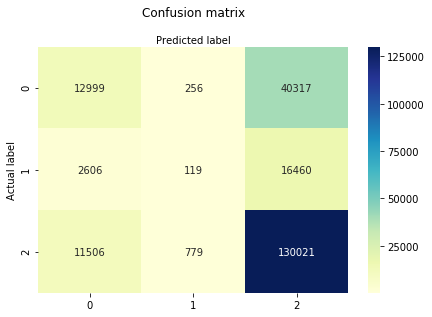

In [13]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv, y_train)
y_pred=bag.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Bagging
Accuracy: 0.641807284377136
              precision    recall  f1-score   support

           0       0.43      0.36      0.39     53572
           1       0.11      0.03      0.04     19185
           2       0.71      0.83      0.77    142306

   micro avg       0.64      0.64      0.64    215063
   macro avg       0.42      0.40      0.40    215063
weighted avg       0.59      0.64      0.61    215063



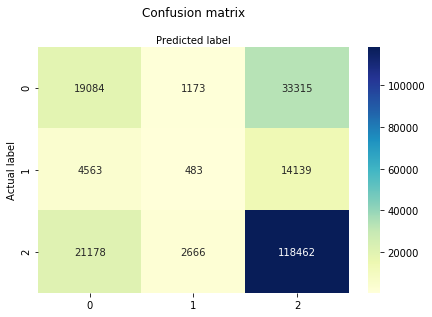

In [14]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_tfidf, y_train)
y_pred=bag.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Bagging
Accuracy: 0.6731422885387073
              precision    recall  f1-score   support

           0       0.51      0.22      0.31     53572
           1       0.10      0.00      0.01     19185
           2       0.70      0.93      0.80    142306

   micro avg       0.67      0.67      0.67    215063
   macro avg       0.43      0.39      0.37    215063
weighted avg       0.60      0.67      0.61    215063



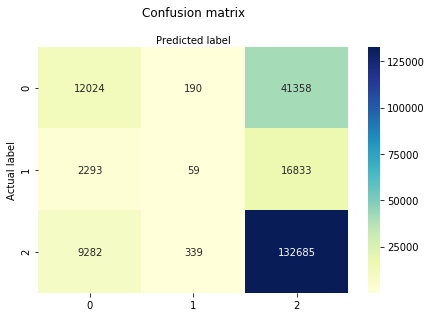

In [15]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv_ngrams, y_train)
y_pred=bag.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [11]:
tk = Tokenizer(lower = True)
tk.fit_on_texts(X_train)
X_seq_train = tk.texts_to_sequences(X_train)
X_pad_train = pad_sequences(X_seq_train, maxlen=100, padding='post')
tk.fit_on_texts(X_test)
X_seq_test = tk.texts_to_sequences(X_test)
X_pad_test = pad_sequences(X_seq_test, maxlen=100, padding='post')
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
X_pad_train, val_X, y_train_categorical, val_y = train_test_split(X_pad_train, y_train_categorical, stratify=y_train_categorical, test_size=0.1)
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100
embedding_size = 32
batch_size = 64


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           1716640   
_________________________________________________________________
lstm_4 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 603       
Total params: 1,903,643
Trainable params: 1,903,643
Non-trainable params: 0
_________________________________________________________________
None
Train on 3719 samples, validate on 414 samples
Epoch 1/10
3719/3719 [==============================] - 13s 3ms/step - loss: 0.8649 - acc: 0.6768 - val_loss: 0.8388 - val_acc: 0.6763
Epoch 2/10
3719/3719 [==============================] - 12s 3ms/step - loss: 0.8407 - acc: 0.6763 - val_loss: 0.8344 - val_acc: 0.6763
Epoch 3/10
3719/3719 [==============================

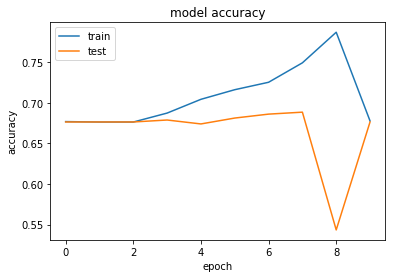

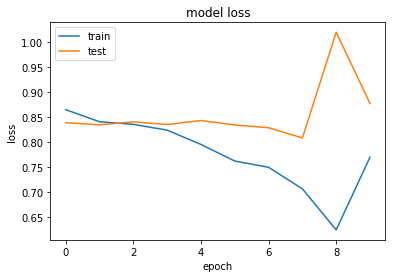

Word Embeddings and LSTM with adam optimiser
Test Accuracy: 66.169448
215063/215063 [==============================] - 37s 174us/step
              precision    recall  f1-score   support

           0       0.24      0.50      0.32     53572
           1       0.00      0.00      0.00     19185
           2       0.66      1.00      0.80    142306

   micro avg       0.51      0.79      0.62    215063
   macro avg       0.30      0.50      0.37    215063
weighted avg       0.50      0.79      0.61    215063
 samples avg       0.54      0.79      0.63    215063



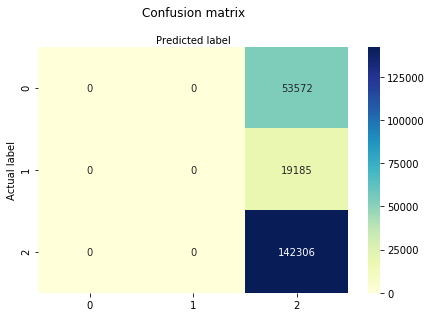

In [29]:
max_words = 100
embedding_size = 32
batch_size = 64
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_pad_train,y_train_categorical,batch_size = batch_size , epochs = 10,validation_data=(val_X, val_y))
plotting(history)
loss, acc = model.evaluate(X_pad_test,y_test_categorical, verbose=0)
print("Word Embeddings and LSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))
y_pred = model.predict([X_pad_test], batch_size=1024, verbose=1)
print(classification_report(y_test_categorical, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 100)          5364500   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 51  

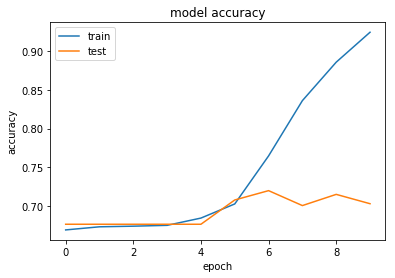

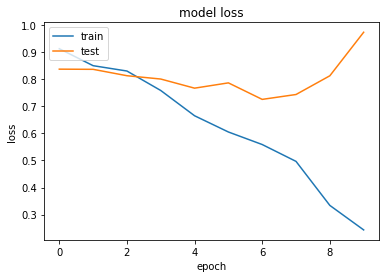

Word Embeddings and BiLSTM with adam optimiser
Test Accuracy: 60.656645
215063/215063 [==============================] - 39s 180us/step
              precision    recall  f1-score   support

           0       0.22      0.01      0.01     53572
           1       0.08      0.02      0.03     19185
           2       0.66      0.79      0.72    142306

   micro avg       0.64      0.52      0.58    215063
   macro avg       0.32      0.27      0.25    215063
weighted avg       0.50      0.52      0.48    215063
 samples avg       0.52      0.52      0.52    215063



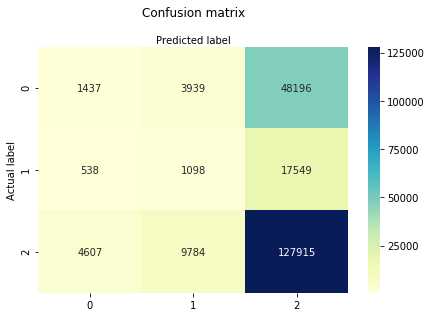

In [14]:
embed_size = 100
inp = Input(shape=(100,))
x = Embedding(vocabulary_size, embed_size)(inp)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(3, activation="sigmoid")(x)
model_biLSTM = Model(inputs=inp, outputs=x)
model_biLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_biLSTM.summary())
history = model_biLSTM.fit(X_pad_train,y_train_categorical,batch_size = batch_size , epochs = 10,validation_data=(val_X, val_y))
plotting(history)
loss, acc = model_biLSTM.evaluate(X_pad_test,y_test_categorical, verbose=0)
print("Word Embeddings and BiLSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))
y_pred = model_biLSTM.predict([X_pad_test], batch_size=1024, verbose=1)
print(classification_report(y_test_categorical, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)